Cargamos el archivo de reviews scrapeadas.

In [1]:
import pandas as pd

flybondi_data = '../data/final_combined_reviews.csv'
df = pd.read_csv(flybondi_data)

## Empezamos a limpiar.

1. Remover columnas inútiles y filas duplicadas.

In [2]:
# remove the unnamed columns which are trash
df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

Limpiamos ratings para que tenga unico formato (int), pasamos nombres a lower para id.

In [3]:
# Extraer solo los números de la columna 'rating' y convertir a float
df_cleaned['rating_cleaned'] = df_cleaned['rating'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

df_cleaned['rating_cleaned'] = df_cleaned['rating_cleaned'].fillna(1).astype(int)

# Eliminar la columna original 'rating' y renombrar la nueva columna a 'rating'
df_cleaned = df_cleaned.drop(columns=['rating'])
df_cleaned = df_cleaned.rename(columns={'rating_cleaned': 'rating'})

# Convertir a minúsculas la columna 'name'
df_cleaned['name'] = df_cleaned['name'].str.lower()

# Mostrar las filas a partir de la 1300
df_cleaned.iloc[1300:]


,name,experience,review_text,likes,review_title,rating
1300,silvia elena p,NaN,Excelente el servicio. Tripulación súper atent...,NaN,Altamente recomendable. Equipo amable y eficie...,5
1301,martina b,NaN,"Todo un desastre, el vuelo de ida se atraso 3 ...",NaN,Peor experiencia,1
1302,carolina c,NaN,Que les puedo decir que no sepamos: es una aer...,NaN,HDP AIRLINES,1
1303,jime ache 🤩,NaN,Quiero destacar que todo fue impecable en el v...,NaN,Todo fue un 10,5
1304,cami d,NaN,Desastre. Nos cambiaron el horario de vuelo mu...,NaN,Desastre,1
...,...,...,...,...,...,...
2357,pablo romero,1 opinión,Si quieren saber el significado de las palabra...,NaN,SERVICIO NEFASTO FLYBONDI,1
2358,aurélien c,6 opiniones,"Compré un primer boleto, el cheque se cerró co...",NaN,Estafa total,1
2359,marcos medvescig,1 opinión,La peor experience. Me cambiarion el horario d...,NaN,La peor basura voladora del mundo,1
2360,silvia elena perez sbarbatti,1 opinión,La empresa cumplió con las condiciones pautada...,NaN,"Excelente la puntualidad, la atención y el sev...",5


Concatenamos titulos con reviews.

In [4]:
# Concatenar solo si 'review_title' no está vacío
df_cleaned['review'] = df_cleaned['review_title'].fillna('') + \
                       df_cleaned['review_title'].apply(lambda x: '. ' if pd.notna(x) and x != '' else '') + \
                       df_cleaned['review_text'].fillna('')

# Eliminar las columnas 'review_title' y 'review_text'
df_cleaned = df_cleaned.drop(columns=['review_title', 'review_text'])

# Convertir todo a minúsculas
df_cleaned['review'] = df_cleaned['review'].str.lower()

# Mostrar las últimas filas
df_cleaned.tail()


,name,experience,likes,rating,review
2357,pablo romero,1 opinión,NaN,1,servicio nefasto flybondi. si quieren saber el...
2358,aurélien c,6 opiniones,NaN,1,"estafa total. compré un primer boleto, el cheq..."
2359,marcos medvescig,1 opinión,NaN,1,la peor basura voladora del mundo. la peor exp...
2360,silvia elena perez sbarbatti,1 opinión,NaN,5,"excelente la puntualidad, la atención y el sev..."
2361,nazarena sebastianelli,2 opiniones,NaN,3,realmente lo pensaría dos veces antes…. realme...


Removemos reviews que tengan nombre repetido dejando el review más largo ya que esto fue error de scrapping.

In [5]:
import pandas as pd

# Función para obtener la fila con la reseña más larga dentro de cada grupo
def longest_review(group):
    # Asegurarte de que 'name' esté en el resultado
    return group.loc[group['review'].str.len().idxmax()]
# Aplicar la función longest_review al grupo, sin que 'name' desaparezca
df_cleaned = df_cleaned.groupby('name', group_keys=False).apply(longest_review)

# Restablecer el índice para tener el DataFrame limpio
df_cleaned.reset_index(drop=True, inplace=True)

# Verificar que 'name' esté presente
df_cleaned.shape


/tmp/ipykernel_789231/1821086584.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df_cleaned.groupby('name', group_keys=False).apply(longest_review)


(1893, 5)

Formateamos "likes" para que sea int y los que sean Nan sean 0.

In [6]:
df_cleaned['likes'] = df_cleaned['likes'].fillna(0)
df_cleaned['likes'] = df_cleaned['likes'].astype(int)

df_cleaned

,name,experience,likes,rating,review
0,22fortinero,NaN,0,1,malisima. malisimo..la peor.\nvuando fuimos pe...
1,23russellv,NaN,0,2,one of the worst we have flown. we have flown ...
2,4family,NaN,0,1,terrible service. flight was first delayed 25 ...
3,5travellers602013,NaN,0,1,rubbish low cost airline. bought 6 tickets via...
4,885david_r885,NaN,0,1,not refunding cancelled flights. not refunding...
...,...,...,...,...,...
1888,валерия шульга,1 reseña,3,1,el vuelo fue reprogramado sin informarnos al r...
1889,вика мегалис,3 reseñas,2,1,me gustaría decirles a todos: nunca compren la...
1890,дарья венедиктова,1 reseña,5,1,"esta empresa ya hace un año que no viene, fue ..."
1891,יסמין י,NaN,0,1,dont buy here!!!! scam. it's completely ridicu...


Creamos una función que transforma la experience y los likes columnas para transformar después en un único valor.

In [7]:
import re

def parse_experience(experience):
    resenas = 0
    fotos = 0
    local_guide = 0

    if pd.isna(experience):
        return resenas, fotos, local_guide

    if 'Local Guide' in experience:
        local_guide = 1

    resenas_match = re.search(r'(\d+[\.,]?\d*) (reseñas|opinión|opiniones)', experience)
    if resenas_match:
        resenas = int(resenas_match.group(1).replace('.', '').replace(',', '.'))

    fotos_match = re.search(r'(\d+[\.,]?\d*) fotos', experience)
    if fotos_match:
        fotos = int(fotos_match.group(1).replace('.', '').replace(',', '.'))

    return resenas, fotos, local_guide

df_cleaned[['given_reviews', 'pictures', 'local_guide']] = df_cleaned['experience'].apply(
    lambda x: pd.Series(parse_experience(x))
)

df_cleaned[['given_reviews', 'pictures', 'local_guide']]
df_cleaned = df_cleaned.drop(columns=['experience'])
df_cleaned


,name,likes,rating,review,given_reviews,pictures,local_guide
0,22fortinero,0,1,malisima. malisimo..la peor.\nvuando fuimos pe...,0,0,0
1,23russellv,0,2,one of the worst we have flown. we have flown ...,0,0,0
2,4family,0,1,terrible service. flight was first delayed 25 ...,0,0,0
3,5travellers602013,0,1,rubbish low cost airline. bought 6 tickets via...,0,0,0
4,885david_r885,0,1,not refunding cancelled flights. not refunding...,0,0,0
...,...,...,...,...,...,...,...
1888,валерия шульга,3,1,el vuelo fue reprogramado sin informarnos al r...,0,0,0
1889,вика мегалис,2,1,me gustaría decirles a todos: nunca compren la...,3,0,0
1890,дарья венедиктова,5,1,"esta empresa ya hace un año que no viene, fue ...",0,0,0
1891,יסמין י,0,1,dont buy here!!!! scam. it's completely ridicu...,0,0,0


In [8]:
def calculate_relevance(row, W_l=0.3, W_r=0.5, W_p=0.005, W_lg=0.5):
    relevance = (
        W_l * row['likes'] +
        W_r * row['given_reviews'] +
        W_p * row['pictures'] +
        W_lg * row['local_guide']
    )
    return relevance

df_cleaned['relevance_score'] = df_cleaned.apply(calculate_relevance, axis=1)
df_cleaned['relevance_score_normalized'] = (df_cleaned['relevance_score'] - df_cleaned['relevance_score'].min()) / (df_cleaned['relevance_score'].max() - df_cleaned['relevance_score'].min())

df_cleaned

,name,likes,rating,review,given_reviews,pictures,local_guide,relevance_score,relevance_score_normalized
0,22fortinero,0,1,malisima. malisimo..la peor.\nvuando fuimos pe...,0,0,0,0.00,0.000000
1,23russellv,0,2,one of the worst we have flown. we have flown ...,0,0,0,0.00,0.000000
2,4family,0,1,terrible service. flight was first delayed 25 ...,0,0,0,0.00,0.000000
3,5travellers602013,0,1,rubbish low cost airline. bought 6 tickets via...,0,0,0,0.00,0.000000
4,885david_r885,0,1,not refunding cancelled flights. not refunding...,0,0,0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...
1888,валерия шульга,3,1,el vuelo fue reprogramado sin informarnos al r...,0,0,0,0.90,0.001745
1889,вика мегалис,2,1,me gustaría decirles a todos: nunca compren la...,3,0,0,2.10,0.004072
1890,дарья венедиктова,5,1,"esta empresa ya hace un año que no viene, fue ...",0,0,0,1.50,0.002909
1891,יסמין י,0,1,dont buy here!!!! scam. it's completely ridicu...,0,0,0,0.00,0.000000


In [9]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)  # Returns a language code (e.g., 'en', 'es')
    except LangDetectException:
        return 'unknown'  # Handle cases where language detection fails

df_cleaned['language'] = df_cleaned['review'].apply(detect_language)

# Display the DataFrame with the new 'language' column
df_cleaned[['review', 'language']]

output_file_translated_reviews = '../data/cleaning_pipeline/before_translated.csv'
df_cleaned.to_csv(output_file_translated_reviews, index=False)

,review,language
0,malisima. malisimo..la peor.\nvuando fuimos pe...,es
1,one of the worst we have flown. we have flown ...,en
2,terrible service. flight was first delayed 25 ...,en
3,rubbish low cost airline. bought 6 tickets via...,en
4,not refunding cancelled flights. not refunding...,en
...,...,...
1888,el vuelo fue reprogramado sin informarnos al r...,es
1889,me gustaría decirles a todos: nunca compren la...,es
1890,"esta empresa ya hace un año que no viene, fue ...",es
1891,dont buy here!!!! scam. it's completely ridicu...,en


Vemos que porcentajes de reviews hay escritos en cada idiomas.

In [10]:
from googletrans import Translator
from googletrans import LANGUAGES

translator = Translator()

def translate_to_spanish(text, src_lang):
    try:
        translation = translator.translate(text, src=src_lang, dest='en') 
        return translation.text
    except Exception as e:
        print("could not translate: ", text)
        print(f"Error translating: {e}")
        return text

def translate_non_spanish(text, lang):
    if lang != 'en' and lang != 'unknown':
        return translate_to_spanish(text, lang)
    return text

df_cleaned['review_translated'] = df_cleaned.apply(
    lambda row: translate_non_spanish(row['review'], row['language']),
    axis=1
)

df_cleaned[['review', 'language', 'review_translated']]

# Optionally, save the updated DataFrame
output_file_translated_reviews = '../data/cleaning_pipeline/after_translated.csv'
df_cleaned.to_csv(output_file_translated_reviews, index=False)


could not translate:  pesadilla en el aeropuerto . low cost no significa destrato.. buenas tardes a todos. les voy a contar mi pesadilla del domingo 23/02 con esta empresa en el aeropuerto de bariloche en el vuelo fo 5271 bariloche - el palomar.

me presento a la hora indicada para hacer el despacho de maletas en el aeropuerto de bariloche. tuvimos que esperar aproximadamente 2 hs haciendo la fila ya que ninguno de los pasajeros era atendido. finalmente nos indican que nuestro vuelo no salia en el horario correspondiente "por problemas tecnicos"y es reprogramado para las 23.30 hs. con el cambio de aeropuerto ya que el palomar cierra 22 hs . se nos indica que llegariamos a ezeiza. siendo las 22 hs nos presentamos nuevamente, y es aqui cuando nos devuelven el equipaje y se nos avisa que nuevamente el vuelo se reprograma para el dia sig. luego de gritos y reclamos ( de todo tipo ) nos dan un voucher para la cena y la promesa fallida de un alojamiento en bariloche cosa que nunca se produjo

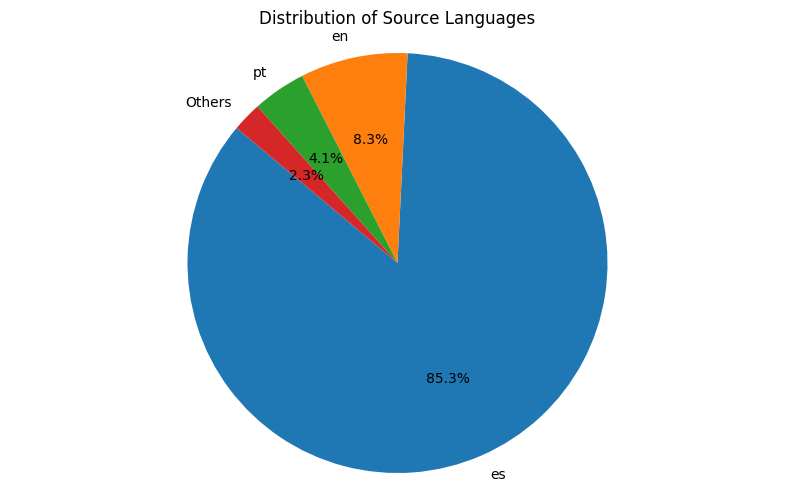

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Simular el DataFrame con datos de ejemplo
# df_cleaned = pd.read_csv('your_file.csv')  # Si ya tienes el archivo cargado

# Contar la ocurrencia de cada idioma
language_counts = df_cleaned['source_language'].value_counts()

# Separar los 4 idiomas más comunes y agrupar el resto en "Others"
top_languages = language_counts[:3]  # Top 4 languages
others_count = language_counts[3:].sum()  # Suma del resto de los idiomas
others_series = pd.Series([others_count], index=['Others'])

# Usar pd.concat en lugar de append
language_counts_modified = pd.concat([top_languages, others_series])

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(language_counts_modified, labels=language_counts_modified.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Source Languages')
plt.axis('equal')  # Mantener aspecto igual para que la torta sea circular
plt.show()


## Checkpoint 1 

desde acá se puede ejecutar sin ejecutar lo previo si se cuenta con un archivo traducido en cleaning_pipeline. Es posible que sea necesario volver a ejecutar el import de algunas librerías.

In [24]:
from nltk.corpus import stopwords
import string
import re
import pandas as pd



# Cargar los datos
flybondi_data = '../data/cleaning_pipeline/after_translated.csv'
df_cleaned = pd.read_csv(flybondi_data)

# Filtrar las filas donde 'review_translated' es nulo o está vacío
df_cleaned = df_cleaned[~(df_cleaned['review_translated'].isna() | (df_cleaned['review_translated'].astype(str).str.strip() == ''))]

# Cambiar a stopwords en inglés
english_stopwords = set(stopwords.words('english'))

# Definir la puntuación, pero en vez de eliminarla, la reemplazamos con un espacio
punctuation = string.punctuation + '¡'

def remove_emojis(text):
    # Expresión regular para detectar emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticones
        "\U0001F300-\U0001F5FF"  # símbolos y pictogramas
        "\U0001F680-\U0001F6FF"  # símbolos de transporte y mapas
        "\U0001F1E0-\U0001F1FF"  # banderas
        "\U00002702-\U000027B0"  # otros símbolos
        "\U000024C2-\U0001F251"  # caracteres cerrados
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def preprocess_text(text):
    # Asegurar que el texto no sea nulo o NaN
    if pd.isna(text):
        return ''
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar emojis
    text = remove_emojis(text)
    
    # Reemplazar puntuación con espacios en lugar de simplemente eliminarla
    text = re.sub(f"[{re.escape(punctuation)}]", " ", text)
    
    # Eliminar stopwords en inglés
    text_words = text.split()
    text = ' '.join([word for word in text_words if word not in english_stopwords])
    
    return text

# Convertir todos los valores en 'review_translated' a string, y manejar NaN
df_cleaned['review_translated'] = df_cleaned['review_translated'].astype(str)

# Aplicar el preprocesamiento a la columna 'review_translated'
df_cleaned['review_processed'] = df_cleaned['review_translated'].apply(preprocess_text)

# Mostrar las columnas procesadas
df_cleaned[['review_translated', 'review_processed']]

# Eliminar la columna 'review_translated'
df_cleaned = df_cleaned.rename(columns={'language': 'source_language'})
df_cleaned = df_cleaned.drop(columns=['review_translated', 'relevance_score', 'review', 'given_reviews', 'pictures', 'local_guide', 'likes'])

# Renombrar 'review_processed' a 'review'
df_cleaned = df_cleaned.rename(columns={'review_processed': 'review'})
df_cleaned = df_cleaned.rename(columns={'relevance_score_normalized': 'relevance_score'})

df_cleaned


,name,rating,relevance_score,source_language,review
0,22fortinero,1,0.000000,es,terrible terrible worst vuando lost hotel day ...
1,23russellv,2,0.000000,en,one worst flown flown hundreds airlines possib...
2,4family,1,0.000000,en,terrible service flight first delayed 25 min s...
3,5travellers602013,1,0.000000,en,rubbish low cost airline bought 6 tickets via ...
4,885david_r885,1,0.000000,en,refunding cancelled flights refunding canceled...
...,...,...,...,...,...
1888,валерия шульга,1,0.001745,es,flight reprogrammed without informing us paid ...
1889,вика мегалис,1,0.004072,es,would like tell everyone never buy flybondi fl...
1890,дарья венедиктова,1,0.002909,es,company come year ago waste time coming
1891,יסמין י,1,0.000000,en,dont buy scam completely ridiculous flight del...


# Lemmatizador
Ahora que tenemos un dataset con todas las reviews limpias y traducidas procedemos a lemmatizar el texto.

In [25]:
import stanza

df = df_cleaned

# Descargar el modelo de inglés
stanza.download('en')
nlp = stanza.Pipeline('en')

def lemmatize_english(text):
    doc = nlp(text)
    return ' '.join([word.lemma for sent in doc.sentences for word in sent.words])

# Aplicar la función de lematización a las reviews en inglés
df['review'] = df['review'].apply(lemmatize_english)

# Guardar el DataFrame actualizado con las reviews lematizadas
output_file_lemmatized_reviews = '../data/cleaned_with_lemmatized_reviews.csv'
df.to_csv(output_file_lemmatized_reviews, index=False)


/home/chris/Desktop/itba/2024C2/sia/tps/envtp1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-20 17:42:52 INFO: Downloaded file to /home/chris/stanza_resources/resources.json
2024-10-20 17:42:52 INFO: Downloading default packages for language: en (English) ...
2024-10-20 17:44:19 INFO: Downloaded file to /home/chris/stanza_resources/en/default.zip
2024-10-20 17:44:22 INFO: Finished downloading models and saved to /home/chris/stanza_resources
2024-10-20 17:44:22 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-10-20 17:44:22 INFO: Downloaded file to /home/chris/stanza_resources/resources.json
2024-10-20 17:44:25 INFO: Loading these models for langu

KeyboardInterrupt: 